<a href="https://colab.research.google.com/github/shubhampandey78/Public-Service-Demand-Forecasting/blob/main/MPR_SEM6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Define folder structure
folders = [
    "data/raw", "data/processed", "notebooks", "models", "scripts", "results"
]

# Create folders
for folder in folders:
    os.makedirs(folder, exist_ok=True)

# Create placeholder files
files = [
    "README.md", "requirements.txt",
    "notebooks/EDA.ipynb", "notebooks/Regression_Model.ipynb", "notebooks/TensorFlow_Model.ipynb",
    "scripts/preprocess.py", "scripts/train_model.py"
]

for file in files:
    with open(file, "w") as f:
        pass  # Just creating empty files


In [ ]:
import pandas as pd
df = pd.read_csv("data/raw/PMC Hospital Infrastructure.csv")  # Change filename accordingly
df.head()


,City Name,Zone Name,Ward Name,Zone No.,Ward No.,Facility Name,Type (Hospital / Nursing Home / Lab),Class : (Public / Private),Pharmacy Available : Yes/No,Number of Beds in Emergency Wards,Number of Beds in facility type,Number of Doctors / Physicians,Number of Nurses,Number of Midwives Professional,Average Monthly Patient Footfall,Ambulance Service Available,Count of Ambulance
0,Pune,kasba - vishrambagwada WO,Ambil Odha,5.0,NaN,"Late Matoshri Ramabai Ambedkar Maternity Home,...",Hospital (Maternity Home),Public,Yes,0,10,2,4,1,4500,Yes,1
1,Pune,Aundh - Baner WO,Aundh,2.0,NaN,"Aundh Kuti Maternity Home, Aundh",Hospital (Maternity Home),Public,Yes,0,14,2,5,2,2500,Yes,1
2,Pune,Aundh - Baner WO,Bopodi,2.0,NaN,Late Draupadabai Murlidhar Khedekar Maternity ...,Hospital (Maternity Home),Public,Yes,0,16,2,4,9,1900,Yes,1
3,Pune,Ghole Road - Shivaji Nagar WO,Shivaji Nagar Station,2.0,NaN,"Dr. Dalvi, PMC Joint Project",Hospital (Maternity Home),Public,Yes,0,30,4,7,9,2400,Yes,2
4,Pune,Hadapsar - Mundhwa WO,Hadapsar,4.0,NaN,"Late Anna Saheb Magar Maternity Home, Hadapsar",Hospital (Maternity Home),Public,Yes,0,20,2,3,6,4500,Yes,1


In [ ]:
from google.colab import auth
auth.authenticate_user()

!git config --global user.email "shubham78p@gmail.com"
!git config --global user.name "shubhampandey78"


In [ ]:
cd /content

/content


In [ ]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [ ]:
!ls -R /content


/content:
sample_data

/content/sample_data:
anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [ ]:
!echo "drive/MyDrive/*.gsheet" >> .gitignore
!echo ".ipynb_checkpoints/" >> .gitignore
!echo "__pycache__/" >> .gitignore
!git add .gitignore


In [ ]:
!git init  # Initialize Git in /content
!git add .  # Stage all files
!git commit -m "Added project structure and dataset"  # Commit the changes
!git branch -M main  # Rename branch to main (if not already)
!git remote add origin https://github.com/shubhampandey78/Public-Service-Demand-Forecasting.git  # Add GitHub repo
!git push -u origin main  # Push everything to GitHub


Reinitialized existing Git repository in /content/.git/
error: open("drive/MyDrive/BMC PUBLIC XRAYJUN-2023.gdoc"): Operation not supported
error: unable to index file 'drive/MyDrive/BMC PUBLIC XRAYJUN-2023.gdoc'
fatal: adding files failed
[main 3a0361f] Added project structure and dataset
 1 file changed, 3 insertions(+)
 create mode 100644 .gitignore
error: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!git add .gitignore
!git commit -m "Added .gitignore file"
!git push origin main


On branch main
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	README.md
	data/
	drive/
	notebooks/
	requirements.txt
	scripts/

nothing added to commit but untracked files present (use "git add" to track)
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!git config --global user.email "shubham78p@gmail.com"
!git config --global user.name "shubhampandey78"
!git config --global credential.helper store


In [ ]:
!echo "drive/" >> .gitignore
!echo "*.gsheet" >> .gitignore
!echo "*.gdoc" >> .gitignore
!echo ".ipynb_checkpoints/" >> .gitignore
!echo "__pycache__/" >> .gitignore
!git add .gitignore
!git commit -m "Updated .gitignore to exclude Drive files"


[main 94c9c3f] Updated .gitignore to exclude Drive files
 1 file changed, 5 insertions(+)


In [ ]:
!git init  # Initialize Git in /content
!git add .  # Stage all files
!git commit -m "Added project structure and dataset"  # Commit the changes
!git branch -M main  # Rename branch to main (if not already)
!git remote add origin https://github.com/shubhampandey78/Public-Service-Demand-Forecasting.git  # Add GitHub repo
!git push -u origin main  # Push everything to GitHub


Reinitialized existing Git repository in /content/.git/
[main 9a2c5bd] Added project structure and dataset
 8 files changed, 738 insertions(+)
 create mode 100644 README.md
 create mode 100644 data/raw/PMC Hospital Infrastructure.csv
 create mode 100644 notebooks/EDA.ipynb
 create mode 100644 notebooks/Regression_Model.ipynb
 create mode 100644 notebooks/TensorFlow_Model.ipynb
 create mode 100644 requirements.txt
 create mode 100644 scripts/preprocess.py
 create mode 100644 scripts/train_model.py
error: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address


In [21]:
!git remote remove origin


In [22]:
!git add .

In [25]:
# Check shape (rows, columns)
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check column data types
print("\nColumn Data Types:")
print(df.dtypes)

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset contains 737 rows and 17 columns.

Column Data Types:
City Name                                 object
Zone Name                                 object
Ward Name                                 object
Zone No.                                 float64
Ward No.                                 float64
Facility Name                             object
Type  (Hospital / Nursing Home / Lab)     object
 Class : (Public / Private)               object
Pharmacy Available : Yes/No               object
Number of Beds in Emergency Wards         object
Number of Beds in facility type            int64
Number of Doctors / Physicians            object
Number of Nurses                          object
Number of Midwives Professional           object
Average Monthly Patient Footfall          object
Ambulance Service Available               object
Count of Ambulance                        object
dtype: object

Missing Values:
City Name                                  0
Zone Name                    

# Data Cleaning


In [26]:
# Drop 'Ward No.' column since it has all missing values
df.drop(columns=['Ward No.'], inplace=True)

In [33]:
# Fill missing values using direct assignment
df.loc[:, 'Zone Name'] = df['Zone Name'].fillna(df['Zone Name'].mode()[0])  # Fill with most frequent value
df.loc[:, 'Zone No.'] = df['Zone No.'].fillna(df['Zone No.'].median())  # Fill with median value
df.loc[:, 'Ward Name'] = df['Ward Name'].fillna(df['Ward Name'].mode()[0])
df.loc[:, 'Average Monthly Patient Footfall'] = df['Average Monthly Patient Footfall'].fillna(df['Average Monthly Patient Footfall'].median())

In [36]:
# Convert numerical columns from object to int/float
df.loc[:, 'Number of Doctors / Physicians'] = pd.to_numeric(df['Number of Doctors / Physicians'], errors='coerce')
df.loc[:, 'Number of Nurses'] = pd.to_numeric(df['Number of Nurses'], errors='coerce')
df.loc[:, 'Number of Midwives Professional '] = pd.to_numeric(df['Number of Midwives Professional '], errors='coerce')
df.loc[:, 'Average Monthly Patient Footfall'] = pd.to_numeric(df['Average Monthly Patient Footfall'], errors='coerce')

In [37]:
# Rename columns to remove extra spaces
df.rename(columns=lambda x: x.strip(), inplace=True)

In [38]:
# Recheck missing values after transformations
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())



Missing Values After Cleaning:
City Name                                  0
Zone Name                                  0
Ward Name                                  0
Zone No.                                   0
Facility Name                              0
Type  (Hospital / Nursing Home / Lab)      0
Class : (Public / Private)                 0
Pharmacy Available : Yes/No                0
Number of Beds in Emergency Wards          0
Number of Beds in facility type            0
Number of Doctors / Physicians           663
Number of Nurses                         663
Number of Midwives Professional          663
Average Monthly Patient Footfall           0
Ambulance Service Available                0
Count of Ambulance                         0
dtype: int64


In [39]:
print(df.columns)


Index(['City Name', 'Zone Name', 'Ward Name', 'Zone No.', 'Facility Name',
       'Type  (Hospital / Nursing Home / Lab)', 'Class : (Public / Private)',
       'Pharmacy Available : Yes/No', 'Number of Beds in Emergency Wards',
       'Number of Beds in facility type', 'Number of Doctors / Physicians',
       'Number of Nurses', 'Number of Midwives Professional',
       'Average Monthly Patient Footfall', 'Ambulance Service Available',
       'Count of Ambulance'],
      dtype='object')


In [40]:
df['Number of Midwives Professional'] = pd.to_numeric(df.get('Number of Midwives Professional'), errors='coerce')


In [41]:
# Recheck missing values after transformations
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())



Missing Values After Cleaning:
City Name                                  0
Zone Name                                  0
Ward Name                                  0
Zone No.                                   0
Facility Name                              0
Type  (Hospital / Nursing Home / Lab)      0
Class : (Public / Private)                 0
Pharmacy Available : Yes/No                0
Number of Beds in Emergency Wards          0
Number of Beds in facility type            0
Number of Doctors / Physicians           663
Number of Nurses                         663
Number of Midwives Professional          663
Average Monthly Patient Footfall           0
Ambulance Service Available                0
Count of Ambulance                         0
dtype: int64


In [42]:
# Check final column data types
print("\nUpdated Column Data Types:")
print(df.dtypes)


Updated Column Data Types:
City Name                                 object
Zone Name                                 object
Ward Name                                 object
Zone No.                                 float64
Facility Name                             object
Type  (Hospital / Nursing Home / Lab)     object
Class : (Public / Private)                object
Pharmacy Available : Yes/No               object
Number of Beds in Emergency Wards         object
Number of Beds in facility type            int64
Number of Doctors / Physicians            object
Number of Nurses                          object
Number of Midwives Professional          float64
Average Monthly Patient Footfall         float64
Ambulance Service Available               object
Count of Ambulance                        object
dtype: object


In [43]:
# Convert numerical columns from object to int/float
numeric_columns = [
    'Number of Beds in Emergency Wards',
    'Number of Doctors / Physicians',
    'Number of Nurses',
    'Number of Midwives Professional',
    'Average Monthly Patient Footfall',
    'Count of Ambulance'
]

for col in numeric_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()  # Remove extra spaces
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric

# Check final column data types again
print("\nUpdated Column Data Types:")
print(df.dtypes)



Updated Column Data Types:
City Name                                 object
Zone Name                                 object
Ward Name                                 object
Zone No.                                 float64
Facility Name                             object
Type  (Hospital / Nursing Home / Lab)     object
Class : (Public / Private)                object
Pharmacy Available : Yes/No               object
Number of Beds in Emergency Wards        float64
Number of Beds in facility type            int64
Number of Doctors / Physicians           float64
Number of Nurses                         float64
Number of Midwives Professional          float64
Average Monthly Patient Footfall         float64
Ambulance Service Available               object
Count of Ambulance                       float64
dtype: object


In [44]:
# List of columns that should be numeric
numeric_columns = [
    'Number of Beds in Emergency Wards',
    'Number of Doctors / Physicians',
    'Number of Nurses',
    'Number of Midwives Professional',
    'Average Monthly Patient Footfall',
    'Count of Ambulance'
]

# Convert these columns to numeric, handling errors
for col in numeric_columns:
    if col in df.columns:  # Ensure column exists
        df[col] = df[col].astype(str).str.strip()  # Remove spaces
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, set errors as NaN

# Check final column data types
print("\nUpdated Column Data Types:")
print(df.dtypes)



Updated Column Data Types:
City Name                                 object
Zone Name                                 object
Ward Name                                 object
Zone No.                                 float64
Facility Name                             object
Type  (Hospital / Nursing Home / Lab)     object
Class : (Public / Private)                object
Pharmacy Available : Yes/No               object
Number of Beds in Emergency Wards        float64
Number of Beds in facility type            int64
Number of Doctors / Physicians           float64
Number of Nurses                         float64
Number of Midwives Professional          float64
Average Monthly Patient Footfall         float64
Ambulance Service Available               object
Count of Ambulance                       float64
dtype: object


In [45]:
print("Columns in dataset:\n", df.columns)
print("\nMissing values after cleaning:\n", df.isnull().sum())


Columns in dataset:
 Index(['City Name', 'Zone Name', 'Ward Name', 'Zone No.', 'Facility Name',
       'Type  (Hospital / Nursing Home / Lab)', 'Class : (Public / Private)',
       'Pharmacy Available : Yes/No', 'Number of Beds in Emergency Wards',
       'Number of Beds in facility type', 'Number of Doctors / Physicians',
       'Number of Nurses', 'Number of Midwives Professional',
       'Average Monthly Patient Footfall', 'Ambulance Service Available',
       'Count of Ambulance'],
      dtype='object')

Missing values after cleaning:
 City Name                                  0
Zone Name                                  0
Ward Name                                  0
Zone No.                                   0
Facility Name                              0
Type  (Hospital / Nursing Home / Lab)      0
Class : (Public / Private)                 0
Pharmacy Available : Yes/No                0
Number of Beds in Emergency Wards        663
Number of Beds in facility type            0
Numb

In [51]:
# Filling missing numerical values with median
numerical_cols = [
    'Number of Beds in Emergency Wards',
    'Number of Doctors / Physicians',
    'Number of Nurses',
    'Number of Midwives Professional',
    'Count of Ambulance'
]

for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())  # Safe assignment without warning

# Check missing values again
print("\nMissing values after filling:\n", df.isnull().sum())



Missing values after filling:
 City Name                                0
Zone Name                                0
Ward Name                                0
Zone No.                                 0
Facility Name                            0
Type  (Hospital / Nursing Home / Lab)    0
Class : (Public / Private)               0
Pharmacy Available : Yes/No              0
Number of Beds in Emergency Wards        0
Number of Beds in facility type          0
Number of Doctors / Physicians           0
Number of Nurses                         0
Number of Midwives Professional          0
Average Monthly Patient Footfall         0
Ambulance Service Available              0
Count of Ambulance                       0
dtype: int64


In [47]:
for col in numerical_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Ensure they are numeric


In [53]:
df.to_csv("cleaned_data.csv", index=False)


In [55]:
df.to_csv("/content/data/processed/cleaned_data.csv", index=False)


## **EDA ANALYSIS**


         Zone No.  Number of Beds in Emergency Wards  \
count  737.000000                              737.0   
mean     3.012212                                0.0   
std      1.357793                                0.0   
min      1.000000                                0.0   
25%      2.000000                                0.0   
50%      3.000000                                0.0   
75%      4.000000                                0.0   
max      5.000000                                0.0   

       Number of Beds in facility type  Number of Doctors / Physicians  \
count                       737.000000                      737.000000   
mean                         21.721845                        1.056988   
std                          63.657392                        0.456842   
min                           0.000000                        1.000000   
25%                           4.000000                        1.000000   
50%                           7.000000             

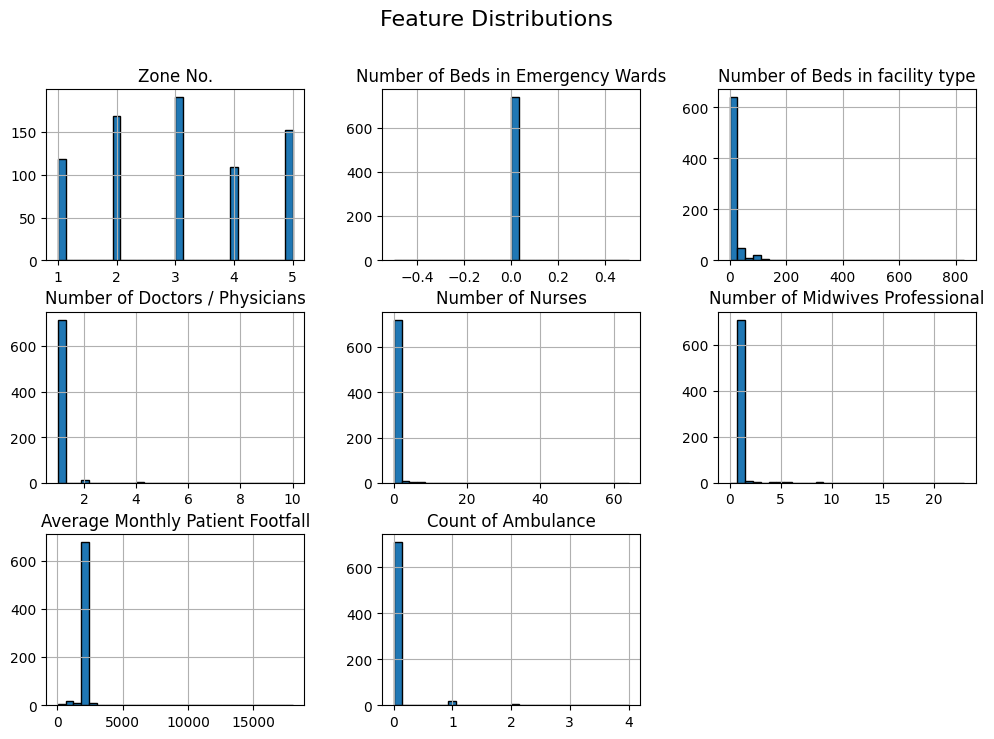

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display summary statistics
print(df.describe())

# Plot distributions of numerical features
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


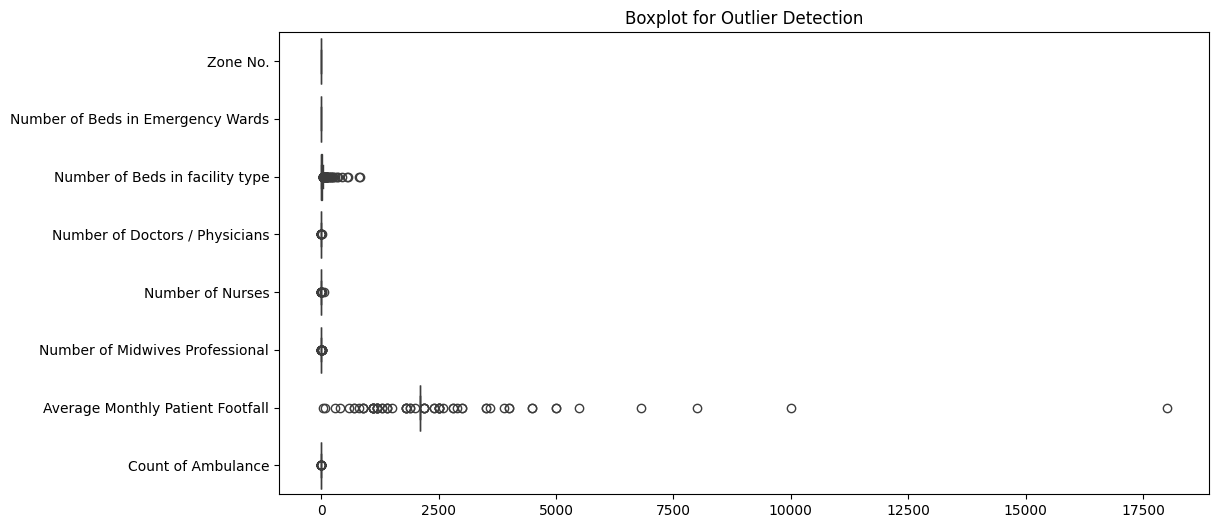

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot for Outlier Detection")
plt.show()


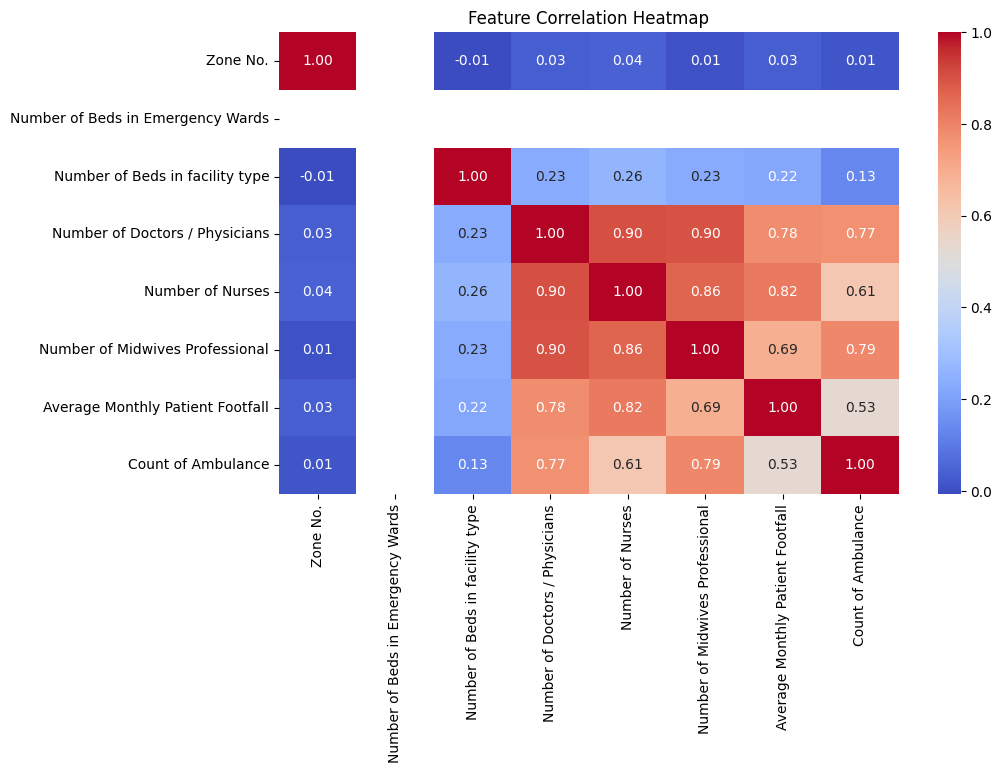

In [72]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])  # Select only numerical columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


<ipython-input-73-f020b8d10ad0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


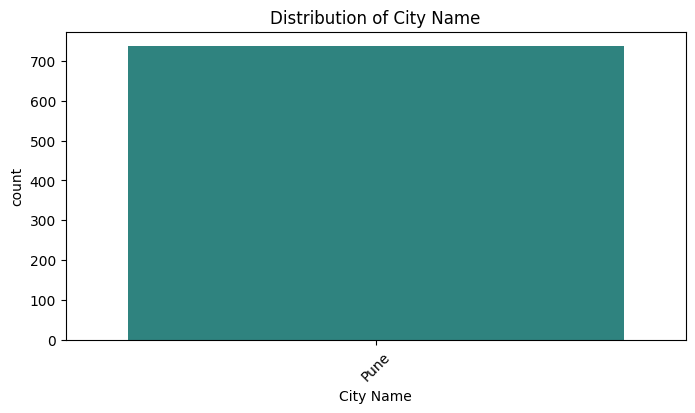

<ipython-input-73-f020b8d10ad0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


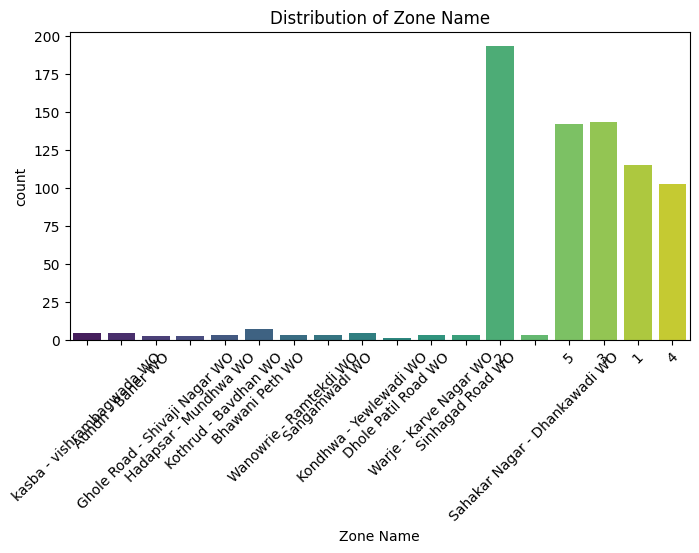

<ipython-input-73-f020b8d10ad0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


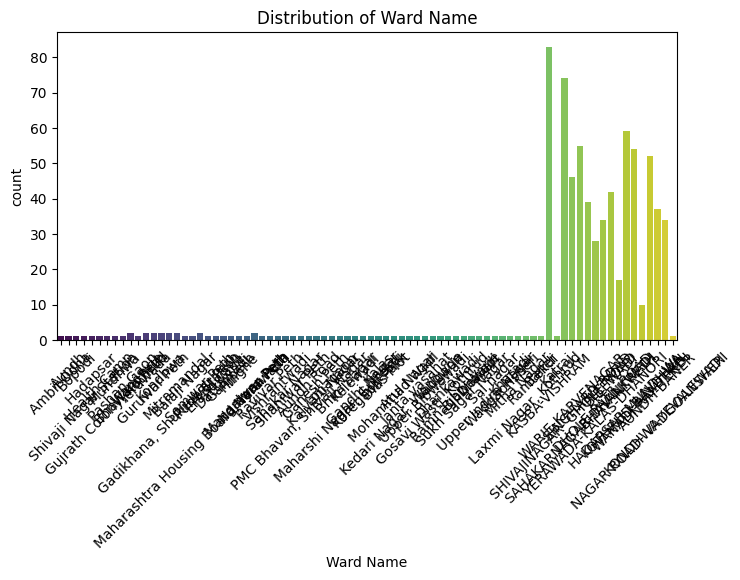

<ipython-input-73-f020b8d10ad0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


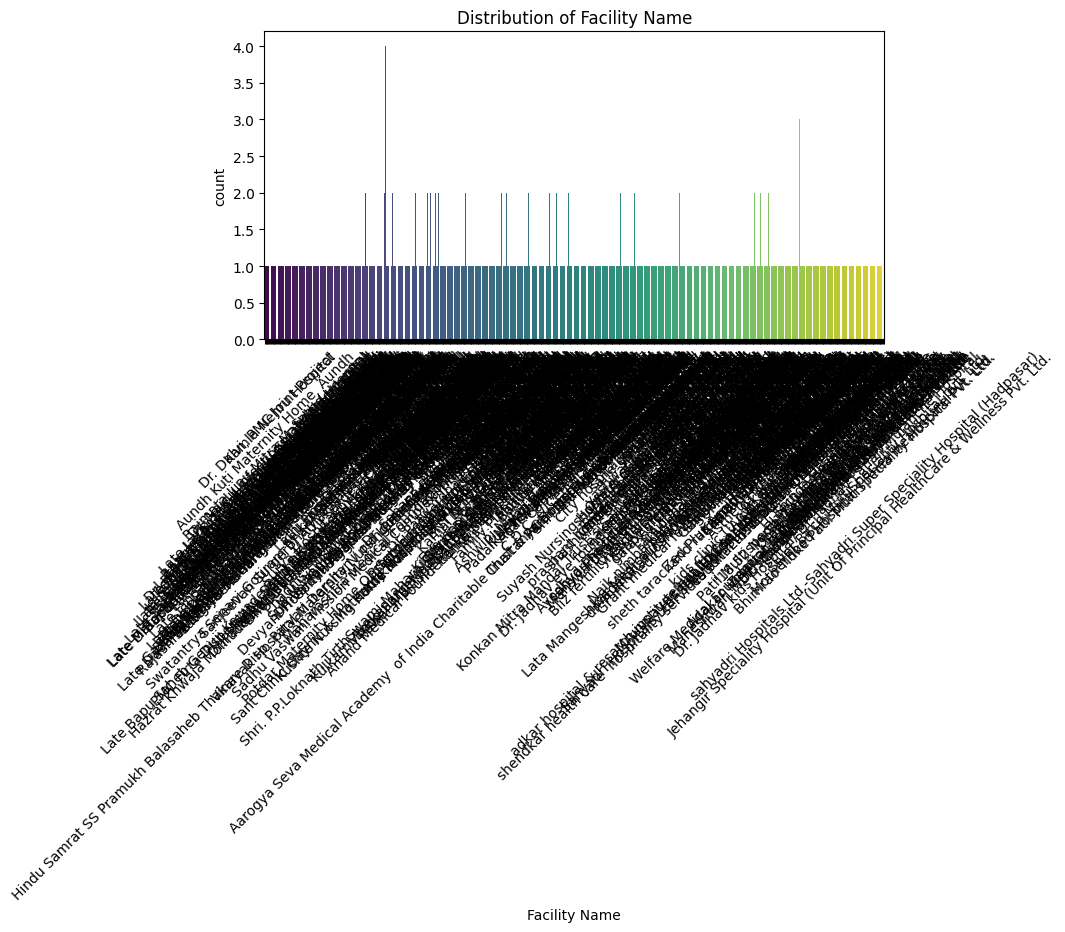

<ipython-input-73-f020b8d10ad0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


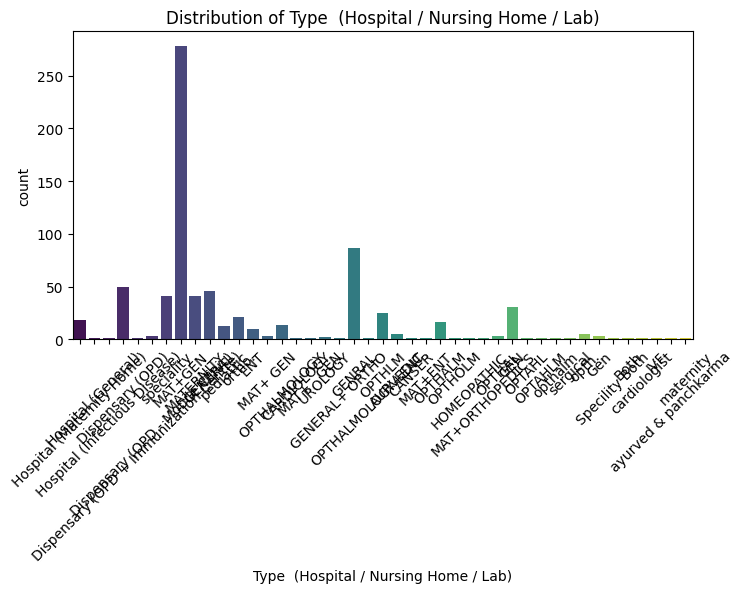

<ipython-input-73-f020b8d10ad0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


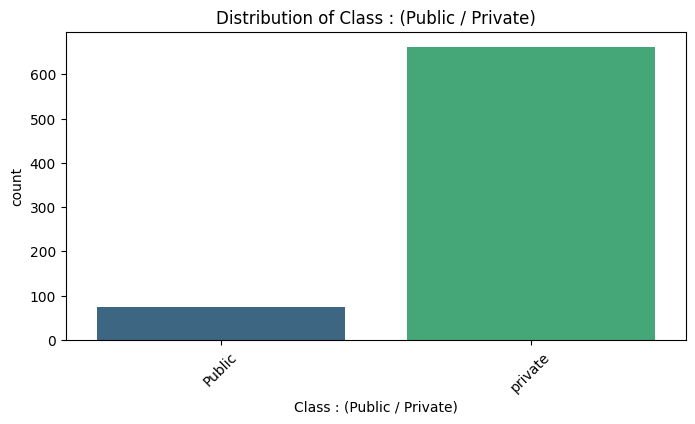

<ipython-input-73-f020b8d10ad0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


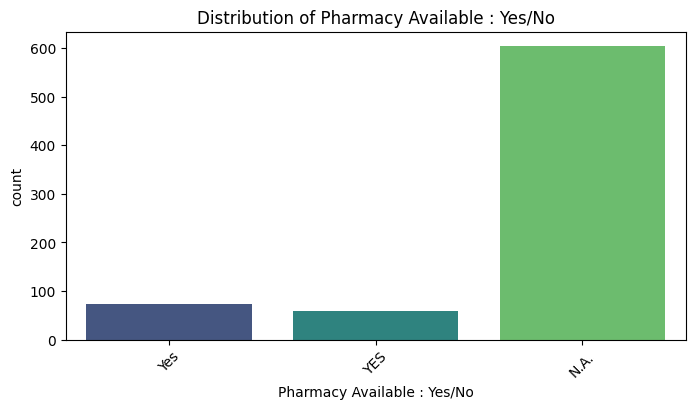

<ipython-input-73-f020b8d10ad0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")


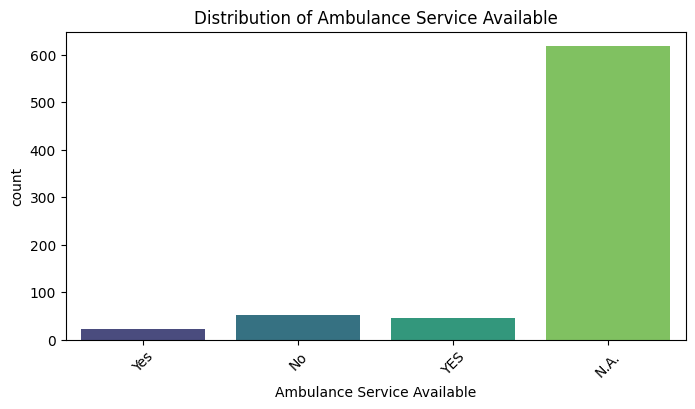

In [73]:
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()


In [85]:
df = pd.read_csv("cleaned_data.csv")  # If you saved it after cleaning but before encoding


# **DATA PRE-PROCESSING**

Handling Categorical Variables

In [74]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

# Apply Label Encoding for categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categories to numerical values
    label_encoders[col] = le  # Store the encoder for future use

print("\nDataset after encoding:")
print(df.head())


Categorical Columns: Index(['City Name', 'Zone Name', 'Ward Name', 'Facility Name',
       'Type  (Hospital / Nursing Home / Lab)', 'Class : (Public / Private)',
       'Pharmacy Available : Yes/No', 'Ambulance Service Available'],
      dtype='object')

Dataset after encoding:
   City Name  Zone Name  Ward Name  Zone No.  Facility Name  \
0          0         17          1       5.0            316   
1          0          5          3       2.0             48   
2          0          5         12       2.0            307   
3          0          8         66       2.0            138   
4          0          9         27       4.0            297   

   Type  (Hospital / Nursing Home / Lab)  Class : (Public / Private)  \
0                                     16                           0   
1                                     16                           0   
2                                     16                           0   
3                                     16              

In [86]:
print(df.columns)  # Show all column names
print(df.head())   # Show first few rows of the dataset
print(df.dtypes)   # Check data types of each column


Index(['City Name', 'Zone Name', 'Ward Name', 'Zone No.', 'Facility Name',
       'Type  (Hospital / Nursing Home / Lab)', 'Class : (Public / Private)',
       'Pharmacy Available : Yes/No', 'Number of Beds in Emergency Wards',
       'Number of Beds in facility type', 'Number of Doctors / Physicians',
       'Number of Nurses', 'Number of Midwives Professional',
       'Average Monthly Patient Footfall', 'Ambulance Service Available',
       'Count of Ambulance'],
      dtype='object')
  City Name                      Zone Name              Ward Name  Zone No.  \
0      Pune      kasba - vishrambagwada WO             Ambil Odha       5.0   
1      Pune               Aundh - Baner WO                  Aundh       2.0   
2      Pune               Aundh - Baner WO                 Bopodi       2.0   
3      Pune  Ghole Road - Shivaji Nagar WO  Shivaji Nagar Station       2.0   
4      Pune          Hadapsar - Mundhwa WO               Hadapsar       4.0   

                                 

Since we have numerical features like Number of Beds, Doctors, etc., we should apply Min-Max Scaling or Standardization.


In [87]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
num_cols = [
    'Zone No.', 'Number of Beds in Emergency Wards', 'Number of Beds in facility type',
    'Number of Doctors / Physicians', 'Number of Nurses', 'Number of Midwives Professional',
    'Count of Ambulance'
]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Feature scaling done ✅")


Feature scaling done ✅


# **Train-Test Split**

In [88]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Average Monthly Patient Footfall'])  # Features
y = df['Average Monthly Patient Footfall']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-Test Split Done ✅")
print("Training Set:", X_train.shape, y_train.shape)
print("Test Set:", X_test.shape, y_test.shape)


Train-Test Split Done ✅
Training Set: (589, 15) (589,)
Test Set: (148, 15) (148,)


# **Implement MLR in TensorFlow**

In [89]:
#Import Required Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd


In [121]:
print(X_train.columns)
print(X_test.columns)


Index(['Zone No.', 'Number of Beds in Emergency Wards',
       'Number of Beds in facility type', 'Number of Doctors / Physicians',
       'Number of Nurses', 'Number of Midwives Professional',
       'Count of Ambulance', 'Type  (Hospital / Nursing Home / Lab)_0',
       'Type  (Hospital / Nursing Home / Lab)_1',
       'Type  (Hospital / Nursing Home / Lab)_2',
       'Type  (Hospital / Nursing Home / Lab)_3',
       'Type  (Hospital / Nursing Home / Lab)_4',
       'Type  (Hospital / Nursing Home / Lab)_5',
       'Type  (Hospital / Nursing Home / Lab)_6',
       'Type  (Hospital / Nursing Home / Lab)_7',
       'Type  (Hospital / Nursing Home / Lab)_8',
       'Type  (Hospital / Nursing Home / Lab)_9',
       'Type  (Hospital / Nursing Home / Lab)_10',
       'Type  (Hospital / Nursing Home / Lab)_11',
       'Type  (Hospital / Nursing Home / Lab)_12',
       'Type  (Hospital / Nursing Home / Lab)_13',
       'Type  (Hospital / Nursing Home / Lab)_14',
       'Type  (Hospital / Nur

In [122]:
if 'Ward Name' in X_train.columns:
    X_train['Ward Name'] = le.fit_transform(X_train['Ward Name'])
else:
    print("Ward Name is missing in X_train")

if 'Ward Name' in X_test.columns:
    X_test['Ward Name'] = le.transform(X_test['Ward Name'])
else:
    print("Ward Name is missing in X_test")


Ward Name is missing in X_train
Ward Name is missing in X_test


In [103]:
print(X_train.columns)
print(categorical_cols)


Index(['Zone No.', 'Type  (Hospital / Nursing Home / Lab)',
       'Class : (Public / Private)', 'Pharmacy Available : Yes/No',
       'Number of Beds in Emergency Wards', 'Number of Beds in facility type',
       'Number of Doctors / Physicians', 'Number of Nurses',
       'Number of Midwives Professional', 'Ambulance Service Available',
       'Count of Ambulance'],
      dtype='object')
['Zone Name', 'Type  (Hospital / Nursing Home / Lab)', 'Class : (Public / Private)', 'Pharmacy Available : Yes/No', 'Ambulance Service Available']


In [104]:
# Ensure all categorical columns exist in X_train before encoding
existing_categorical_cols = [col for col in categorical_cols if col in X_train.columns]
print("Existing categorical columns:", existing_categorical_cols)

# If 'Zone Name' is missing, check why
if 'Zone Name' not in X_train.columns:
    print("'Zone Name' was removed or renamed. Verify preprocessing steps.")


Existing categorical columns: ['Type  (Hospital / Nursing Home / Lab)', 'Class : (Public / Private)', 'Pharmacy Available : Yes/No', 'Ambulance Service Available']
'Zone Name' was removed or renamed. Verify preprocessing steps.


In [106]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns that need encoding
categorical_cols = ['Type  (Hospital / Nursing Home / Lab)',
                    'Class : (Public / Private)', 'Pharmacy Available : Yes/No',
                    'Ambulance Service Available']

# Apply OneHotEncoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(X_train[categorical_cols])
encoded_features_test = encoder.transform(X_test[categorical_cols])

# Convert encoded features to DataFrame
encoded_df_train = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and merge encoded columns
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True)

X_train = pd.concat([X_train, encoded_df_train], axis=1)
X_test = pd.concat([X_test, encoded_df_test], axis=1)


In [107]:
print(X_train.dtypes)  # Check if any non-numeric columns remain
print(X_train.head())  # Inspect the first few rows


Zone No.                                    float64
Number of Beds in Emergency Wards           float64
Number of Beds in facility type             float64
Number of Doctors / Physicians              float64
Number of Nurses                            float64
Number of Midwives Professional             float64
Count of Ambulance                          float64
Type  (Hospital / Nursing Home / Lab)_0     float64
Type  (Hospital / Nursing Home / Lab)_1     float64
Type  (Hospital / Nursing Home / Lab)_2     float64
Type  (Hospital / Nursing Home / Lab)_3     float64
Type  (Hospital / Nursing Home / Lab)_4     float64
Type  (Hospital / Nursing Home / Lab)_5     float64
Type  (Hospital / Nursing Home / Lab)_6     float64
Type  (Hospital / Nursing Home / Lab)_7     float64
Type  (Hospital / Nursing Home / Lab)_8     float64
Type  (Hospital / Nursing Home / Lab)_9     float64
Type  (Hospital / Nursing Home / Lab)_10    float64
Type  (Hospital / Nursing Home / Lab)_11    float64
Type  (Hospi

In [123]:
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns
cols_to_drop = ['City Name', 'Facility Name', 'Ward Name']
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_test = X_test.drop(columns=cols_to_drop, errors='ignore')

# Encode categorical variables
label_encoders = {}
categorical_cols = X_train.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

    # Handle unseen labels in X_test
    X_test[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

    label_encoders[col] = le  # Store encoders for future use

print(X_train.dtypes)  # Check if any non-numeric columns remain
print(X_train.head())  # Inspect the first few rows


Zone No.                                    float64
Number of Beds in Emergency Wards           float64
Number of Beds in facility type             float64
Number of Doctors / Physicians              float64
Number of Nurses                            float64
Number of Midwives Professional             float64
Count of Ambulance                          float64
Type  (Hospital / Nursing Home / Lab)_0     float64
Type  (Hospital / Nursing Home / Lab)_1     float64
Type  (Hospital / Nursing Home / Lab)_2     float64
Type  (Hospital / Nursing Home / Lab)_3     float64
Type  (Hospital / Nursing Home / Lab)_4     float64
Type  (Hospital / Nursing Home / Lab)_5     float64
Type  (Hospital / Nursing Home / Lab)_6     float64
Type  (Hospital / Nursing Home / Lab)_7     float64
Type  (Hospital / Nursing Home / Lab)_8     float64
Type  (Hospital / Nursing Home / Lab)_9     float64
Type  (Hospital / Nursing Home / Lab)_10    float64
Type  (Hospital / Nursing Home / Lab)_11    float64
Type  (Hospi

In [113]:
print(X_test.select_dtypes(include=['object']).head())  # Check remaining categorical values


  Zone Name
0         2
1         2
2         5
3         3
4         4


In [124]:
# Convert data to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)


ValueError: could not convert string to float: 'Warje - Karve Nagar WO'

In [119]:
print(X_train.select_dtypes(include=['object']).columns)
print(X_test.select_dtypes(include=['object']).columns)


Index([], dtype='object')
Index(['Zone Name'], dtype='object')


In [120]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['Ward Name'] = le.fit_transform(X_train['Ward Name'])
X_test['Ward Name'] = le.transform(X_test['Ward Name'])


KeyError: 'Ward Name'